In [84]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

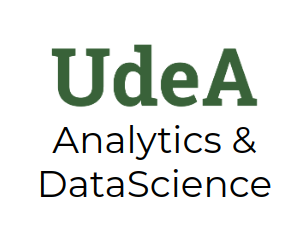

In [85]:
Image('../docs/udea-datascience.png')

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

*   **Nombres Completos**: Maria del mar Ipia Guzman
*   **Número de Cédula**: 1214726595


*   **Nombres Completos**: Johan Arbey Vargas Mejia
*   **Número de Cédula**: 1152195956


Bienvenido al segundo taller de Estadística y Análisis Exploratorio. Esta es una de las tres fuentes de datos disponibles para presentar el taller. Tan solo debes escoger una y realizar los pasos indicados. ¡Mucha suerte!

# Descripción de la base de datos A 🍷 (Cuantitativa)

**Name:** Wine Quality

**Website:** https://archive.ics.uci.edu/ml/datasets/wine+quality

**Description:** 

The dataset is related to a red variant of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link](http://www.vinhoverde.pt/en/) or the reference [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Additionally, there is some missing data from the dataset.

**Attribute Information**


For more information, read [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016).

**Input variables (based on physicochemical tests):**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

**Output variable (based on sensory data):**
1. quality (score between 0 and 10)

Cargue el archivo winequality.csv desde la siguiente URL.

## Librerías

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.style.use('ggplot')

In [36]:
wine_url = 'https://raw.githubusercontent.com/analiticaycienciadatosudea/EstadisticaExploracionDatos/main/winequality.csv'
columns = ['fixed acidity', 'volatile acidity', 'citric acid',
           'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
data = pd.read_csv(wine_url, sep=';', encoding='utf8', usecols=columns)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,?,0.076,11.0,34.0,?,3.51,?,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,?,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,?,9.8,5
3,11.2,0.28,0.56,?,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,?,3.51,0.56,9.4,5


## Exploración inicial y Análisis de Datos Atípicos de los datos de A

En este apartado, se debe cargar la base de datos y generar una exploración inicial, determinando si hay datos faltantes o no y generando un reporte de las estadísticas principales como la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada variable. lUego, se debe realizar una detección de datos atípicos con un algoritmo o método de su elección.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 150.0+ KB


In [38]:
data.shape

(1599, 12)

In [39]:
data[data['volatile acidity'] == '?'].shape[0]

107

In [40]:
lista = []
for col in data.columns:
    num = data[data[col] == '?'].shape[0]
    lista.append(num)

In [41]:
dic = {
    'Columnas': data.columns,
    'Faltantes': lista
}
df_faltantes = pd.DataFrame(dic)

In [42]:
df_faltantes['Porcentaje'] = df_faltantes['Faltantes'] / data.shape[0]

In [43]:
df_faltantes

,Columnas,Faltantes,Porcentaje
0,fixed acidity,94,0.058787
1,volatile acidity,107,0.066917
2,citric acid,109,0.068168
3,residual sugar,97,0.060663
4,chlorides,104,0.065041
5,free sulfur dioxide,94,0.058787
6,total sulfur dioxide,102,0.063790
7,density,83,0.051907
8,pH,69,0.043152
9,sulphates,96,0.060038


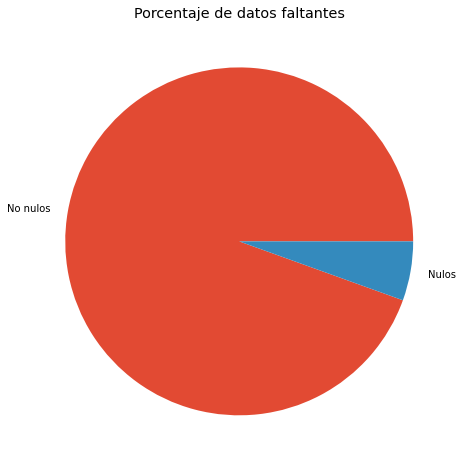

In [48]:
faltantes_total = df_faltantes['Faltantes'].sum()
registros_total = data.shape[0] * data.shape[1]

plt.figure(figsize=(8, 8))
datos = [registros_total - faltantes_total, faltantes_total]
label = ['No nulos', 'Nulos']

plt.pie(datos, labels=label)
plt.title('Porcentaje de datos faltantes')
plt.show()

In [52]:
data = data.replace('?', np.nan).astype(float)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1505 non-null   float64
 1   volatile acidity      1492 non-null   float64
 2   citric acid           1490 non-null   float64
 3   residual sugar        1502 non-null   float64
 4   chlorides             1495 non-null   float64
 5   free sulfur dioxide   1505 non-null   float64
 6   total sulfur dioxide  1497 non-null   float64
 7   density               1516 non-null   float64
 8   pH                    1530 non-null   float64
 9   sulphates             1503 non-null   float64
 10  alcohol               1499 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [55]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1505.000000,1492.000000,1490.000000,1502.000000,1495.000000,1505.000000,1497.000000,1516.000000,1530.000000,1503.000000,1499.000000,1599.000000
mean,8.332159,0.527309,0.270248,2.528029,0.087443,15.918272,46.414830,0.996726,3.311386,0.659787,10.431454,5.636023
std,1.745085,0.179209,0.193030,1.414587,0.048099,10.522738,33.079014,0.001894,0.154461,0.169091,1.068366,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.092500,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
imp_simple = SimpleImputer(missing_values=np.nan, strategy='mean')

In [59]:
imp_simple.fit(data)

SimpleImputer()

In [61]:
matrix = imp_simple.transform(data)

In [62]:
data_imp = pd.DataFrame(matrix, columns=data.columns)

In [63]:
data_imp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,2.528029,0.076,11.0,34.0,0.996726,3.51,0.659787,9.4,5.0
1,7.8,0.88,0.00,2.600000,0.098,25.0,67.0,0.996726,3.20,0.680000,9.8,5.0
2,7.8,0.76,0.04,2.300000,0.092,15.0,54.0,0.997000,3.26,0.659787,9.8,5.0
3,11.2,0.28,0.56,2.528029,0.075,17.0,60.0,0.998000,3.16,0.580000,9.8,6.0
4,7.4,0.70,0.00,1.900000,0.076,11.0,34.0,0.996726,3.51,0.560000,9.4,5.0


In [64]:
data_imp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.332159,0.527309,0.270248,2.528029,0.087443,15.918272,46.414830,0.996726,3.311386,0.659787,10.431454,5.636023
std,1.692981,0.173106,0.186330,1.370981,0.046507,10.208556,32.005894,0.001844,0.151089,0.163933,1.034398,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.400000,0.100000,1.900000,0.071000,8.000000,23.000000,0.995655,3.210000,0.560000,9.500000,5.000000
50%,8.000000,0.527309,0.270248,2.200000,0.080000,15.000000,40.000000,0.996726,3.311386,0.630000,10.300000,6.000000
75%,9.100000,0.630000,0.410000,2.600000,0.089000,21.000000,60.000000,0.997740,3.400000,0.725000,11.000000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


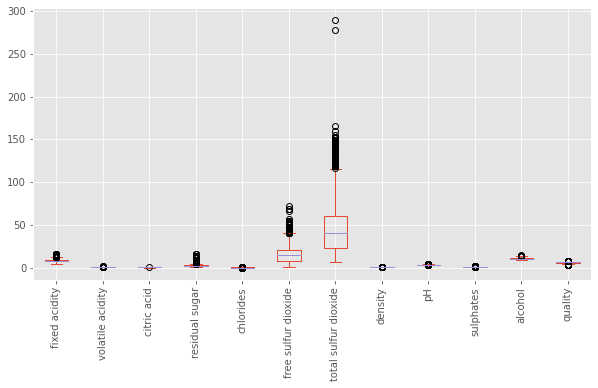

In [67]:
data_imp.plot(kind='box', figsize=(10, 5), rot=90)
plt.show()

In [69]:
min_max = MinMaxScaler(copy=True, feature_range=(0, 1))

array = min_max.fit_transform(data_imp)

data_norm = pd.DataFrame(array, columns=data.columns)

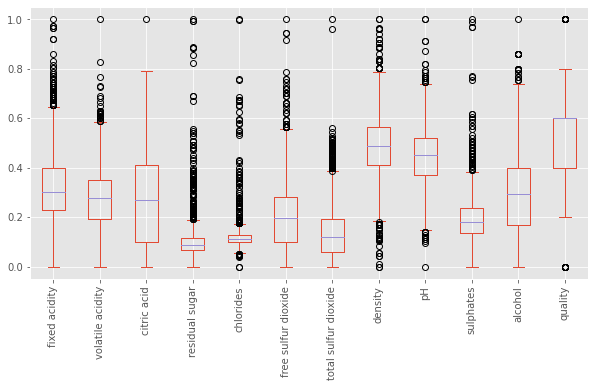

In [73]:
data_norm.plot(kind='box', figsize=(10, 5), rot=90)
plt.show()

In [80]:
lof = LocalOutlierFactor(
    n_neighbors=5, 
    algorithm='auto', 
    contamination='auto',
    metric='euclidean') 

filtrado = lof.fit_predict(data_imp) 

nof = lof.negative_outlier_factor_ 

radio_outiler = (nof.max() - nof) / (nof.max() - nof.min())

ground_truth = np.ones(len(data_imp), dtype=int) 

n_errors = (filtrado != ground_truth).sum()

In [81]:
n_errors

51

In [78]:
ground_truth

array([1, 1, 1, ..., 1, 1, 1])

In [83]:
pos = np.where(filtrado == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers = data_imp.loc[pos, :]
print("Número de muestras sin outilers:", datos_sin_outilers_LOF.shape[0])
datos_sin_outilers

Número de muestras sin outilers: 1548


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,2.528029,0.076,11.000000,34.0,0.996726,3.51,0.659787,9.4,5.0
1,7.8,0.880,0.00,2.600000,0.098,25.000000,67.0,0.996726,3.20,0.680000,9.8,5.0
2,7.8,0.760,0.04,2.300000,0.092,15.000000,54.0,0.997000,3.26,0.659787,9.8,5.0
3,11.2,0.280,0.56,2.528029,0.075,17.000000,60.0,0.998000,3.16,0.580000,9.8,6.0
4,7.4,0.700,0.00,1.900000,0.076,11.000000,34.0,0.996726,3.51,0.560000,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.000000,0.090,32.000000,44.0,0.994900,3.45,0.580000,10.5,5.0
1595,5.9,0.550,0.10,2.200000,0.062,39.000000,51.0,0.995120,3.52,0.760000,11.2,6.0
1596,6.3,0.510,0.13,2.300000,0.076,15.918272,40.0,0.995740,3.42,0.750000,11.0,6.0
1597,5.9,0.645,0.12,2.000000,0.075,32.000000,44.0,0.995470,3.57,0.710000,10.2,5.0


## Análisis Estadístico

En este apartado, los datos filtrados de la sección anterior (Exploración inicial y Análisis de Datos Atípicos) deben ser analizados mediante test estadísticos de acuerdo al tipo de variable (cualitativo, cuantitativo, etc.... Determinar si los datos siguen una determinada distribución de probabilidad y si hay o no correlacción entre las variables.

## Densidad Kernel

En este apartado, se debe encontrar una función de densidad de probabilidad por cada variable o característica de la base de datos. Luego, realizar un análisis comparativo con el análisis estadístico del item anterior.

### **Relación de variables cuantitativas**


En este apartado, se hallará la relación entre las variables del conjunto de datos a través de los métodos aprendidos en clase.

## Escalamiento

En este apartado, se realizará un proceso de escalamiento a las columnas del conjunto de datos. Primero, grafique diagramas de cajas para visualizar la distribución de los datos. ¿Cuál es la columna con mayor cantidad de outliers? Justifique cuál es el mejor método de escalamiento en este caso.



## Conclusiones

**Colocar las conclusiones de la práctica**